## Building a Signal Tracker that predicts Golden Cross and Death Cross

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Download the data for United Health Group (UNH) stock data
data = yf.download('UNH', start='2015-07-20', end='2025-07-18')
data

/tmp/ipykernel_9442/3469073421.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('UNH', start='2015-07-20', end='2025-07-18')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,UNH,UNH,UNH,UNH,UNH
Date,,,,,
2015-07-20,104.948761,106.300732,104.674945,106.146710,3199700
2015-07-21,103.417099,105.008658,102.972143,104.880306,4239100
2015-07-22,103.203156,103.742229,102.749648,103.511200,3384700
2015-07-23,102.107910,104.118749,101.620175,104.075963,4896100
2015-07-24,100.918480,102.441583,100.610436,101.928178,3840600
...,...,...,...,...,...
2025-07-11,304.100006,304.119995,298.000000,300.019989,9808200
2025-07-14,300.579987,304.040009,299.000000,301.640015,10681400


In [9]:
data.columns = data.columns.droplevel(1)

In [10]:
data

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-07-20,104.948761,106.300732,104.674945,106.146710,3199700
2015-07-21,103.417099,105.008658,102.972143,104.880306,4239100
2015-07-22,103.203156,103.742229,102.749648,103.511200,3384700
2015-07-23,102.107910,104.118749,101.620175,104.075963,4896100
2015-07-24,100.918480,102.441583,100.610436,101.928178,3840600
...,...,...,...,...,...
2025-07-11,304.100006,304.119995,298.000000,300.019989,9808200
2025-07-14,300.579987,304.040009,299.000000,301.640015,10681400
2025-07-15,291.709991,300.679993,291.029999,299.709991,16019000


In [12]:
# Calculate the 50-day Simple Moving Average (SMA) and the 200-day Simple Moving Average (SMA)
sma50 = data['Close'].rolling(window=50).mean()
sma200 = data['Close'].rolling(window=200).mean()

In [13]:
# Define a function to detect crossover signals
def detect_crossover(data, short_window=50, long_window=200):
    data['SMA_short'] = data['Close'].rolling(window=short_window).mean() #SMA50
    data['SMA_long'] = data['Close'].rolling(window=long_window).mean() #SMA200

    # Initialize lists to store crossover event dates
    golden_cross_dates = []
    death_cross_dates = []

    # Loop through the data
    for i in range(1, len(data)):
        # Extract the previous and the current SMA values 
        prev_short = data['SMA_short'].iloc[i-1]
        prev_long = data['SMA_long'].iloc[i-1]
        curr_short = data['SMA_short'].iloc[i]
        curr_long = data['SMA_long'].iloc[i]

        # Ensure all values are numeric (not NaN) before comparison
        if pd.notna(prev_short) and pd.notna(prev_long) and pd.notna(curr_short) and pd.notna(curr_long):
            # Detect the Golden cross: short SMA crosses above the long SMA
            if prev_short < prev_long and curr_short > curr_long:
                golden_cross_dates.append(data.index[i])
            # Detect the Death Cross: short SMA crosses below the long SMA
            elif prev_short > prev_long and curr_short < curr_long:
                death_cross_dates.append(data.index[i])
    # Return the lists of crossover dates
    return golden_cross_dates, death_cross_dates

In [14]:
# Detect Cross Signals
golden_cross, death_cross = detect_crossover(data)

In [17]:
# Print the signal dates
print("Golden Cross Dates:")
for date in golden_cross:
    print(date)
print("\nDeath Cross Dates:")
for date in death_cross:
    print(date)

Golden Cross Dates:
2019-11-26 00:00:00
2023-09-13 00:00:00
2024-07-26 00:00:00

Death Cross Dates:
2019-02-26 00:00:00
2023-02-06 00:00:00
2024-03-21 00:00:00
2025-01-31 00:00:00


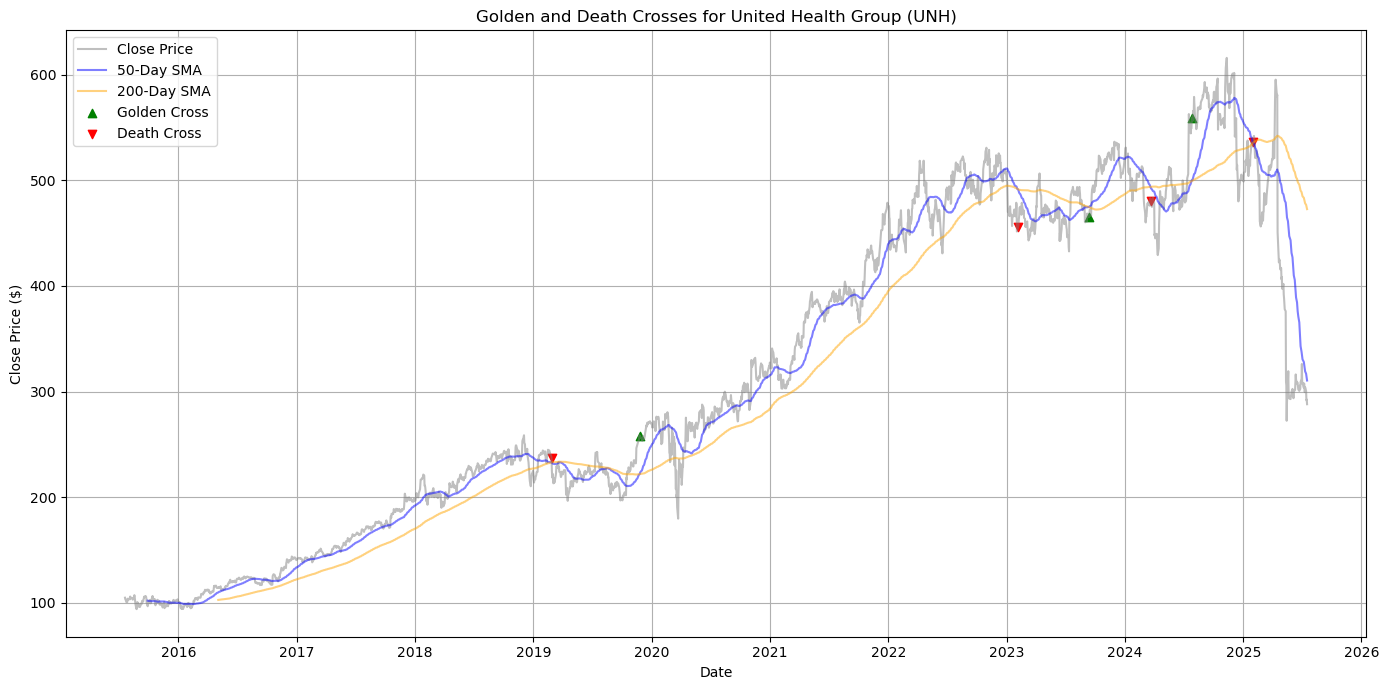

In [20]:
# Plot the stock data and the SMA's
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price', color='gray', alpha=0.5)
plt.plot(data.index, sma50, label='50-Day SMA', color='blue', alpha=0.5)
plt.plot(data.index, sma200, label='200-Day SMA', color='orange', alpha=0.5)

# Add crossover markers
plt.scatter(golden_cross, data.loc[golden_cross, "Close"], marker='^', color='green', label='Golden Cross')
plt.scatter(death_cross, data.loc[death_cross, "Close"], marker= 'v', color='red', label='Death Cross')

# Final chart polishing
plt.title('Golden and Death Crosses for United Health Group (UNH)')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()